## Problem Statement



> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations.
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.
> Use Decision Trees and Random Forests to build a classification model that predicts whether it will rain tomorrow based on today's weather data.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Dowloading the Dataset

In [7]:
raw_df = pd.read_csv('weatherAUS.csv')

In [8]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

> **EXERCISE**: Perform exploratory data analysis on the dataset and study the relationship of other columns with the `RainTomorrow` column.

## Data Exploration

In [11]:
raw_df["Date"] = pd.to_datetime(raw_df["Date"], errors="coerce")

In [12]:
raw_df["RainTomorrow"] = raw_df["RainTomorrow"].astype("string").str.strip()
df = raw_df[raw_df["RainTomorrow"].isin(["Yes", "No"])].copy()

In [36]:
raw_df['RainTomorrow_bin']= raw_df['RainTomorrow'].map({'Yes':1, 'No':0})

In [15]:
raw_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_bin
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0


#### Missingness Observation

In [16]:
missing = raw_df.isna().mean().sort_values(ascending=False) * 100

miss_tbl = missing.to_frame('missing_pct').round(2)
display(miss_tbl)

,missing_pct
Sunshine,47.69
Evaporation,42.79
Cloud3pm,40.15
Cloud9am,37.74
Pressure9am,9.86
Pressure3pm,9.83
WindDir9am,7.04
WindGustDir,6.56
WindGustSpeed,6.52
WindDir3pm,2.66


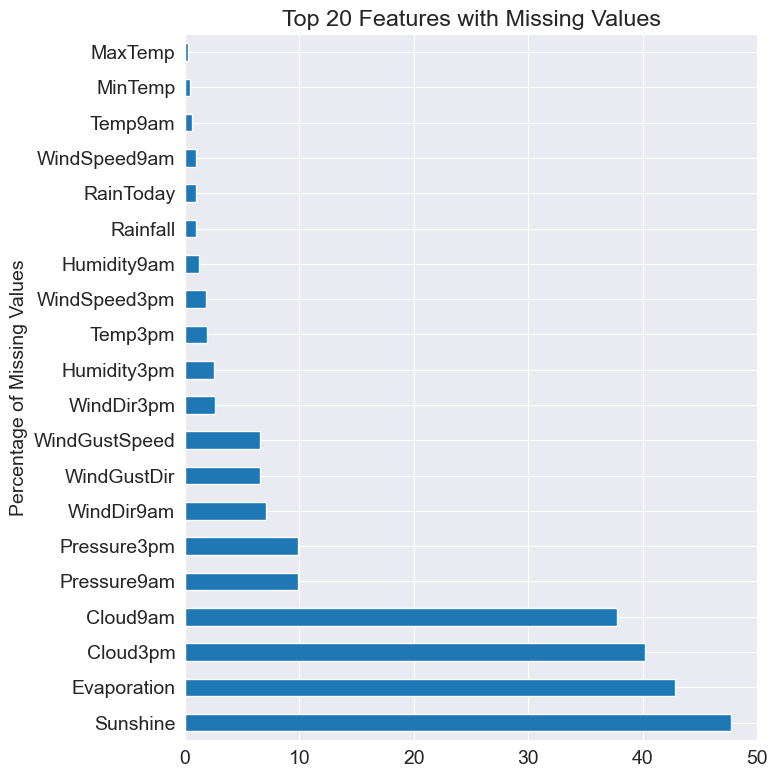

In [18]:
plt.figure(figsize=(8,8))
missing.head(20).plot(kind='barh')
plt.title('Top 20 Features with Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

### Target Variable Distribution

In [19]:
target_counts = raw_df['RainTomorrow'].value_counts(dropna=False)
target_pct = (target_counts / target_counts.sum()*100).round(2)
print("RainTomorrow counts:\n", target_counts)
print("\nRainTomorrow %:\n", target_pct)

RainTomorrow counts:
 RainTomorrow
No     110316
Yes     31877
Name: count, dtype: Int64

RainTomorrow %:
 RainTomorrow
No     77.58
Yes    22.42
Name: count, dtype: Float64


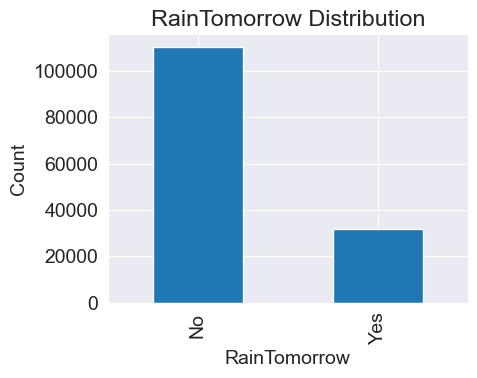

In [20]:
plt.figure(figsize=(5, 4))
target_counts.plot(kind="bar")
plt.title("RainTomorrow Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Numeric Relationships with RainTomorrow

In [28]:
num_cols = raw_df.select_dtypes(include=[np.number]).columns.tolist()
# remove the binary target itself from the feature list
num_feat = [col for col in num_cols if col != 'RainTomorrow_bin']

In [25]:
group_means = raw_df.groupby('RainTomorrow')[num_feat].mean().T
group_means.columns = ['Mean_No', 'Mean_Yes'] if 'No' in group_means.columns else group_means.columns
display(group_means.sort_values(by=group_means.columns[-1], ascending=False).head(20))


,Mean_No,Mean_Yes
Pressure9am,1018.595599,1014.400000
Pressure3pm,1016.113587,1012.300820
Humidity9am,66.217573,77.983314
Humidity3pm,46.510625,68.800019
WindGustSpeed,38.288391,45.946764
MaxTemp,23.836247,21.119100
WindSpeed3pm,18.222804,20.078509
Temp3pm,22.402905,19.197113
Temp9am,17.077001,16.676598
WindSpeed9am,13.567314,15.508577


In [30]:
# Point-biserial correlations (equivalent to Pearson with binary target)
corrs = {}
for c in num_feat:
    # dropna pairwise
    sub = raw_df[["RainTomorrow_bin", c]].dropna()
    if sub[c].nunique() > 1:
        corrs[c] = sub["RainTomorrow_bin"].corr(sub[c])
corr_s = pd.Series(corrs).sort_values(ascending=False)
print("\nTop positive corr with RainTomorrow (binary):")
display(corr_s.head(10).to_frame("corr"))
print("\nTop negative corr with RainTomorrow (binary):")
display(corr_s.tail(10).to_frame("corr"))


Top positive corr with RainTomorrow (binary):


,corr
Humidity3pm,0.446160
Cloud3pm,0.381870
Cloud9am,0.317380
Humidity9am,0.257161
Rainfall,0.239032
WindGustSpeed,0.234010
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691



Top negative corr with RainTomorrow (binary):


,corr
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691
Evaporation,-0.119285
MaxTemp,-0.159237
Temp3pm,-0.192424
Pressure3pm,-0.226031
Pressure9am,-0.246371
Sunshine,-0.450768


Rainy days show **lower pressure** (around 1014 hPa) and **higher humidity**, especially in the afternoon, compared to non-rainy days.
**Wind gusts and overall wind speeds** tend to increase before rain, indicating incoming weather fronts.
**Temperatures (MaxTemp, Temp3pm)** are generally lower on days followed by rain, while **cloud coverage** and **rainfall amounts** rise sharply.
The strongest positive correlations with *RainTomorrow* are **Humidity3pm**, **Cloud3pm**, and **Rainfall**, while **Sunshine** and **Pressure** show strong negative correlations — confirming that **humid, cloudy, and low-pressure days are strong indicators of upcoming rain.**


### Some Plots

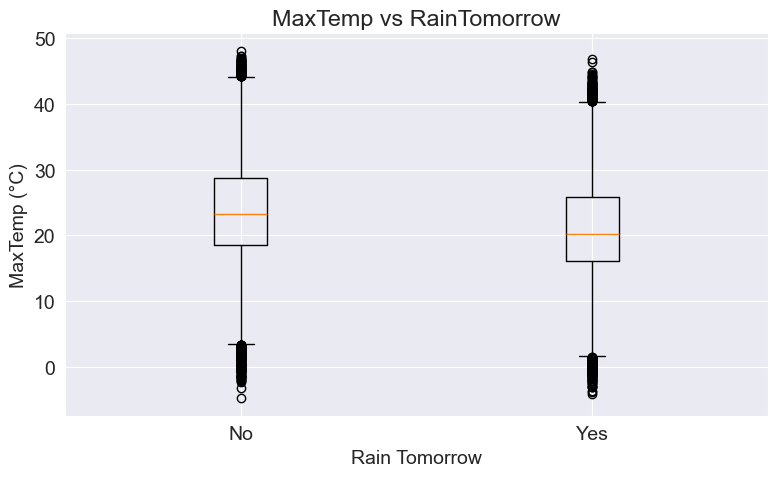

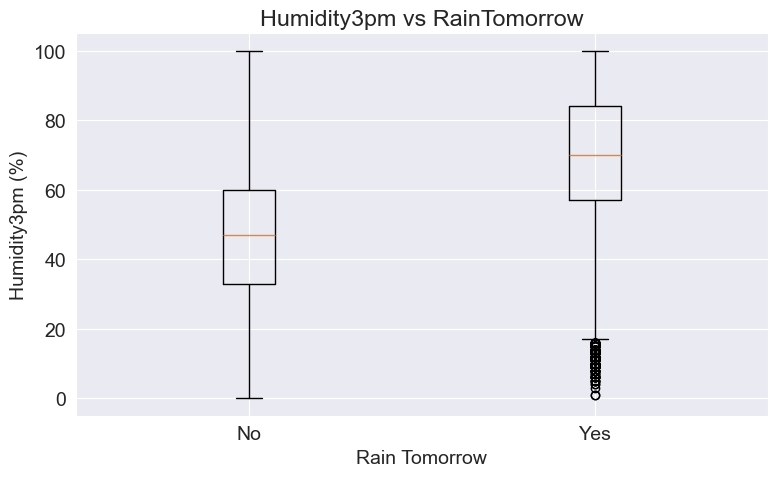

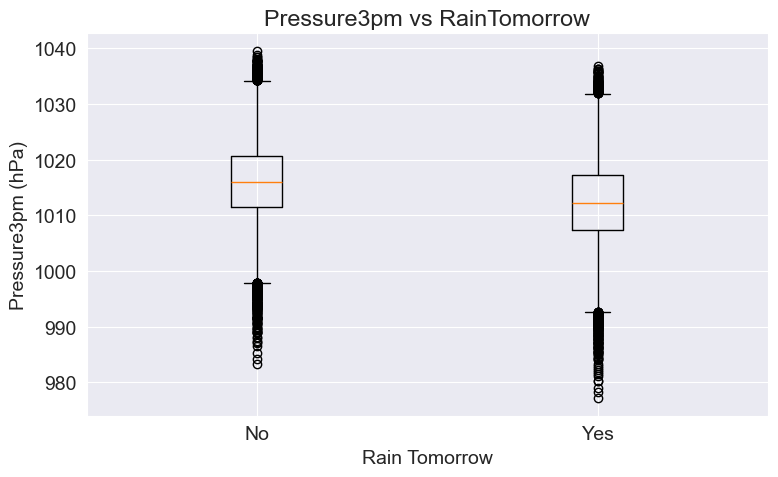

In [33]:
def safe_boxplot(feature,ylabel=None,title=None):
    if feature not in raw_df.columns:
        print(f"Feature '{feature}' not found in DataFrame.")
        return
    sub = raw_df[[feature,'RainTomorrow']].dropna()
    if sub.empty:
        print(f"No data available for feature '{feature}' after dropping NaNs.")
        return
    plt.figure(figsize=(8, 5))
    data_no = sub[sub['RainTomorrow']=='No'][feature]
    data_yes = sub[sub['RainTomorrow']=='Yes'][feature]
    plt.boxplot([data_no, data_yes], tick_labels=['No', 'Yes'])
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(ylabel if ylabel else feature)
    plt.title(title if title else f'{feature} vs Rain Tomorrow')
    plt.tight_layout()
    plt.show()

safe_boxplot("MaxTemp", ylabel="MaxTemp (°C)", title="MaxTemp vs RainTomorrow")
safe_boxplot("Humidity3pm", ylabel="Humidity3pm (%)", title="Humidity3pm vs RainTomorrow")
safe_boxplot("Pressure3pm", ylabel="Pressure3pm (hPa)", title="Pressure3pm vs RainTomorrow")

### Summary

In [40]:
summary_lines = []

# Target imbalance
yes_rate = raw_df["RainTomorrow_bin"].mean()
summary_lines.append(f"- RainTomorrow 'Yes' rate: {yes_rate*100:.2f}% ({(1-yes_rate)*100:.2f}% 'No').")

# Top correlations
top_pos = corr_s.head(5)
top_neg = corr_s.tail(5)

summary_lines.append("\n- Strongest positive numeric correlations with RainTomorrow (binary):")
for k, v in top_pos.items():
    summary_lines.append(f"  • {k}: {v:.3f}")

summary_lines.append("\n- Strongest negative numeric correlations with RainTomorrow (binary):")
for k, v in top_neg.items():
    summary_lines.append(f"  • {k}: {v:.3f}")

# RainToday conditional rates (if present)
if "RainToday" in raw_df.columns:
    tmp = raw_df[["RainToday", "RainTomorrow_bin"]].dropna()
    p_yes_given_yes = tmp.loc[tmp["RainToday"] == "Yes", "RainTomorrow_bin"].mean()
    p_yes_given_no  = tmp.loc[tmp["RainToday"] == "No", "RainTomorrow_bin"].mean()
    summary_lines.append(
        f"\n- P(RainTomorrow=Yes | RainToday=Yes): {p_yes_given_yes*100:.2f}%; "
        f"P(RainTomorrow=Yes | RainToday=No): {p_yes_given_no*100:.2f}%."
    )

print("\n".join(summary_lines))

- RainTomorrow 'Yes' rate: 22.42% (77.58% 'No').

- Strongest positive numeric correlations with RainTomorrow (binary):
  • Humidity3pm: 0.446
  • Cloud3pm: 0.382
  • Cloud9am: 0.317
  • Humidity9am: 0.257
  • Rainfall: 0.239

- Strongest negative numeric correlations with RainTomorrow (binary):
  • MaxTemp: -0.159
  • Temp3pm: -0.192
  • Pressure3pm: -0.226
  • Pressure9am: -0.246
  • Sunshine: -0.451

- P(RainTomorrow=Yes | RainToday=Yes): 46.41%; P(RainTomorrow=Yes | RainToday=No): 15.19%.
